In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
data=pd.read_csv('Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
#Finding out the shape of the data
data.shape

(10, 3)

In [5]:
#Defining the respective input and ouputs
X=data.iloc[:,1:2].values
y=data.iloc[:,-1].values

In [6]:
#Finding out the shape of X
X.shape

(10, 1)

In [7]:
#Finding out the shape og y
y.shape

(10,)

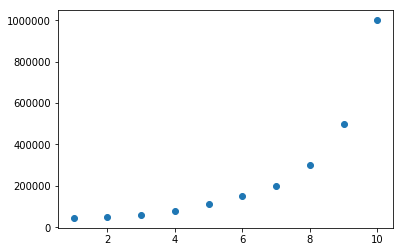

In [8]:
#plotting the graph to find out the nature of the data
plt.scatter(data.Level,data.Salary)

Since the graph is non linear in nature,so instead of using LinearRegression Algorithm we go for Polynomial Regression.

In [9]:
#importing the required libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [10]:
#Defining a function for polynomial regression
def polynomialRegression(X,y,k=14):

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)#Splitting the data into training and testing data

  poly = PolynomialFeatures(degree=k)#Creating an object for the class PolynomialFeatures
  X_poly = poly.fit_transform(X_train)#Fitting the training data
  lr = LinearRegression()#Creating an object for LinearRegression class
  lr.fit(X_poly,y_train)
  
  X_test_poly =poly.fit_transform(X_test)
  y_pred=lr.predict(X_test_poly)#Predicting the output

  training_score = r2_score(y_train, lr.predict(X_poly))
  test_score = r2_score(y_test,y_pred)#Finding out the accuracy of the model
  
  return training_score, test_score


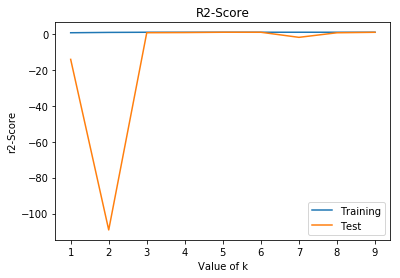

In [16]:
#Function to find out the accurate value of k so that we get a correct value of r2_score
train=[]
test=[]
for i in range(1,10):
  r2train,r2test=polynomialRegression(X,y,k=i)
  train.append(r2train)
  test.append(r2test)
x=np.arange(9)+1
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Value of k")
plt.ylabel("r2-Score")
plt.title("R2-Score");
plt.show()

From the above graph we can see that at k=3,the distance between the training and test data is almost minimum,so it can be assumed that at the value of 3,we get the correct accuracy value of the model.

In [17]:
#Function to plot the best fit line
def polynomialRegression(X,y,k):

    poly = PolynomialFeatures(degree=k)
    X_poly = poly.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly,y)
  
    X_test_poly =poly.fit_transform(X)
    y_pred=lr.predict(X_test_poly)
    
    plt.plot(X,y_pred, label="Model",color='red')
    plt.scatter(X, y, label="data",color='blue')
    plt.legend()
    plt.show()
    
    print("The accuracy of the model is " ,r2_score(y,y_pred)*100)   

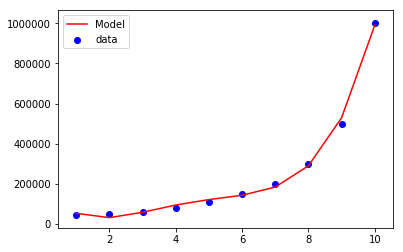

The accuracy of the model is  99.73922891706614


In [18]:
polynomialRegression(X,y,4)

At k=4, we can see that the line is touching all the points and can be considered as over-fitted.Let's take further values of k and find the correct accuracy.

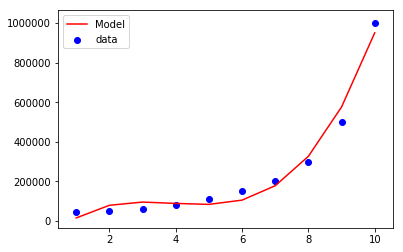

The accuracy of the model is  98.12097727913367


In [19]:
polynomialRegression(X,y,3)

Here at value of 3, the curve is passing through the best fit points. And therefore this value of k can be considered.

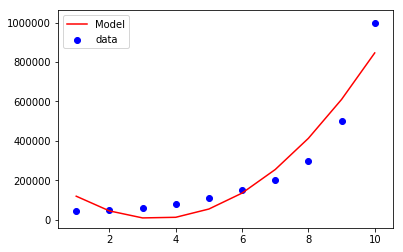

The accuracy of the model is  91.62082221443943


In [20]:
polynomialRegression(X,y,2)

In the above graph,taking value of k as 2, it appears that the curve is not properly fitting through the points and can be considered as under fitted,Therefore, the best value of k can be considered as 3 to get the appropriate accuracy of the model by using Polynomial Regression.